# CICERO SCM notebook example - abrupt4xCO2

Import some stuff

In [1]:
import sys
import re
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as pdt
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

Import the model

In [2]:
sys.path.append('../src')
from ciceroscm import CICEROSCM

Define some input handling functions to give us example inputs

In [3]:
from ciceroscm.input_handler import read_inputfile,read_components,read_natural_emissions

Define a function to convert model output to a dataframe

In [4]:
def to_df(cscm):
    out=pd.concat([pd.DataFrame(v) for k, v in cscm.results.items()], axis = 1, keys = list(cscm.results.keys()))
    return out

set up input directories

In [5]:
test_data_dir = os.getcwd()+'/../tests/test-data'
test_data_dir 

'/home/sanderson/ciceroscm/notebooks/../tests/test-data'

# Read in datafiles into dataframes

In [6]:
#Read gas parameters
gaspam =read_components(test_data_dir + '/gases_v1RCMIP.txt')
gaspam.head()

,EM_UNIT,CONC_UNIT,BETA,ALPHA,TAU1,TAU2,TAU3,NAT_EM
GAS,,,,,,,,
CO2,Pg_C,ppm,2.123,0.00000,150.00,0,0,0.0
CH4,Tg,ppb,2.780,0.00000,9.60,120,160,275.0
N2O,Tg_N,ppb,4.810,0.00000,121.00,0,0,9.5
SO2,Tg_S,-,11.000,0.00000,0.02,0,0,0.0
CFC-11,Gg,ppt,22.600,0.00026,45.00,0,0,0.0


Define constant natural emissions

In [76]:
nt=750

In [77]:
d = {'year': np.arange(1750,1750+nt), 'CH4': np.ones(nt)*275, 'N2O': np.ones(nt)*9.5}
df_nat = pd.DataFrame(data=d)
df_nat=df_nat.set_index('year')
df_nat[['CH4']]


,CH4
year,
1750,275.0
1751,275.0
1752,275.0
1753,275.0
1754,275.0
...,...
2495,275.0
2496,275.0
2497,275.0


Read SSP2.45 concentration file as template, keep all constant to first year values except for CO2, which quadruples in year 1

In [78]:
df_ssp2_conc =read_inputfile(test_data_dir + '/ssp245_conc_RCMIP.txt')


In [118]:
df_a4x_conc = pd.DataFrame(np.repeat(df_ssp2_conc.iloc[[0]].values, nt, axis=0))
df_a4x_conc.columns = df_ssp2_conc.columns
df_a4x_conc['year']=np.arange(1750,nt+1750)
df_a4x_conc=df_a4x_conc.set_index('year')
df_a4x_conc['CO2'].iloc[1:]=df_a4x_conc['CO2'].iloc[0]*4
df_a4x_conc.head()

,CO2,CH4,N2O,CFC-11,CFC-12,CFC-113,CFC-114,CFC-115,CH3Br,CCl4,...,HFC143a,HFC227ea,HFC23,HFC245fa,HFC32,HFC4310mee,C2F6,C6F14,CF4,SF6
year,,,,,,,,,,,,,,,,,,,,,
1750,276.746000,706.054021,272.212049,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1751,1106.983999,706.054021,272.212049,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1752,1106.983999,706.054021,272.212049,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1753,1106.983999,706.054021,272.212049,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0
1754,1106.983999,706.054021,272.212049,0.0,0.0,0.0,0.0,0.0,5.299998,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.049999,0.0


Zero anthropogenic emissions file, using SSP2-45 as template

In [119]:
emi_input =read_inputfile(test_data_dir + '/ssp245_em_RCMIP.txt')
emi_input.rename(columns={"CO2": "CO2_FF", "CO2.1": "CO2_AFOLU"}, inplace=True)


In [120]:
df_a4x_emi = pd.DataFrame(np.repeat(emi_input.iloc[[0]].values*0, nt, axis=0))
df_a4x_emi.columns = emi_input.columns
df_a4x_emi['year']=np.arange(1750,nt+1750)
df_a4x_emi=df_a4x_emi.set_index('year')
df_a4x_emi.head()

,CO2_FF,CO2_AFOLU,CH4,N2O,SO2,CFC-11,CFC-12,CFC-113,CFC-114,CFC-115,...,CF4,SF6,NOx,CO,NMVOC,NH3,BMB_AEROS_BC,BMB_AEROS_OC,BC,OC
year,,,,,,,,,,,,,,,,,,,,,
1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Set up model run with defined input variables

In [121]:
scen = 'test'
cscm_dir=CICEROSCM({
            "gaspam_data": gaspam,
            "emstart": 1750,  
            "conc_run":True, #concentrations driven simulation
            "nystart": 1750,
            "nyend": 1750+nt-1,
            "concentrations_data": df_a4x_conc,
            "emissions_data": df_a4x_emi,
            "nat_ch4_data": df_nat[['CH4']],
            "nat_n2o_data": df_nat[['N2O']],
            "idtm":24,
        })

and run it!

In [122]:
cscm_dir._run({
            "results_as_dict":True
        },
    pamset_udm={"threstemp": 7.0, #scales vertical velocity as a function of mixed layer temperature
                    "rlamdo":16.0,#air-sea heat exchange coefficient (wm^-2K^-1)
                    "akapa":0.634, #vertical heat diffusivity
                    "cpi":0.4, #temperature change ratio: polar to nonpolar region
                    "W":4, #vertical velocity (m/yr)
                    "beto":3.5, #ocean interhemispheric heat exchange coeff (Wm^-2K^-1)
                    "lambda":0.54,
                    "mixed":60.0,  #mixed layer depth
                    "foan":0.61, #fraction of northern hemisphere covered by ocean
                    "foas":0.81, #fraction of northern hemisphere covered by ocean
                    "ebbeta":0.0,#atmospheric interhemispheric heat exchange 
                    "fnso":0.7531, #ocean area ratio, northern to southern hemisphere
                    "lm":40, #number of vertical layers
                    "ldtime":12,
                   },
    pamset_emiconc={"lamb": 0.8,
                    "qbmb":0.03,
                    "qo3":0.4,
                    "qdirso2":-.457,
                    "qindso2":-.514,
                    "qbc":.2,
                    "qoc":-.103,
                    "ref_yr":2010,
                    "idtm":24})

List available output

In [123]:
cscm_dir.results.keys()

dict_keys(['OHC700', 'OHCTOT', 'RIB_glob', 'RIB_N', 'RIB_S', 'dT_glob', 'dT_NH', 'dT_SH', 'dT_glob_air', 'dT_NH_air', 'dT_SH_air', 'dT_glob_sea', 'dT_NH_sea', 'dT_SHsea', 'dSL(m)', 'dSL_thermal(m)', 'dSL_ice(m)', 'Total_forcing', 'emissions', 'concentrations', 'forcing'])

Convert the output to a dataframe for easy handling

In [133]:

df_temp = to_df(cscm_dir)
df_temp.head()

OHC700     OHCTOT  RIB_glob     RIB_N     RIB_S   dT_glob     dT_NH  \
           0          0         0         0         0         0         0   
0   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   5.373398   5.411400  7.402493  7.291879  7.513107  0.295877  0.355608   
2  14.001034  14.220012  6.118021  5.884426  6.351617  0.989367  1.115509   
3  21.441747  21.939741  5.361722  5.129888  5.593556  1.397643  1.522834   
4  28.124461  28.961645  4.877040  4.659389  5.094692  1.659247  1.776779   

      dT_SH dT_glob_air dT_NH_air  ...  forcing                         \
          0           0         0  ... STRAT_O3 STRAT_H2O BMB_AEROS_BC   
0  0.000000    0.000000  0.000000  ...      NaN       NaN          NaN   
1  0.236145    0.506418  0.559953  ...      NaN       NaN          NaN   
2  0.863226    1.332084  1.445140  ...      NaN       NaN          NaN   
3  1.272453    1.697995  1.810198  ...      NaN       NaN          NaN   
4  1.541715    1.932448  2.037788  ...      NaN       NaN          NaN   

                                                              
  BMB_AEROS_OC BMB_AEROS LANDUSE  BC  OC OTHER Total_forcing  
0          NaN       NaN     NaN NaN NaN   NaN           NaN  
1          NaN       NaN     NaN NaN NaN   NaN           NaN  
2          NaN       NaN     NaN NaN NaN   NaN           NaN  
3          NaN       NaN     NaN NaN NaN   NaN           NaN  
4          NaN       NaN     NaN NaN NaN   NaN           NaN  

[5 rows x 153 columns]

# Plot output

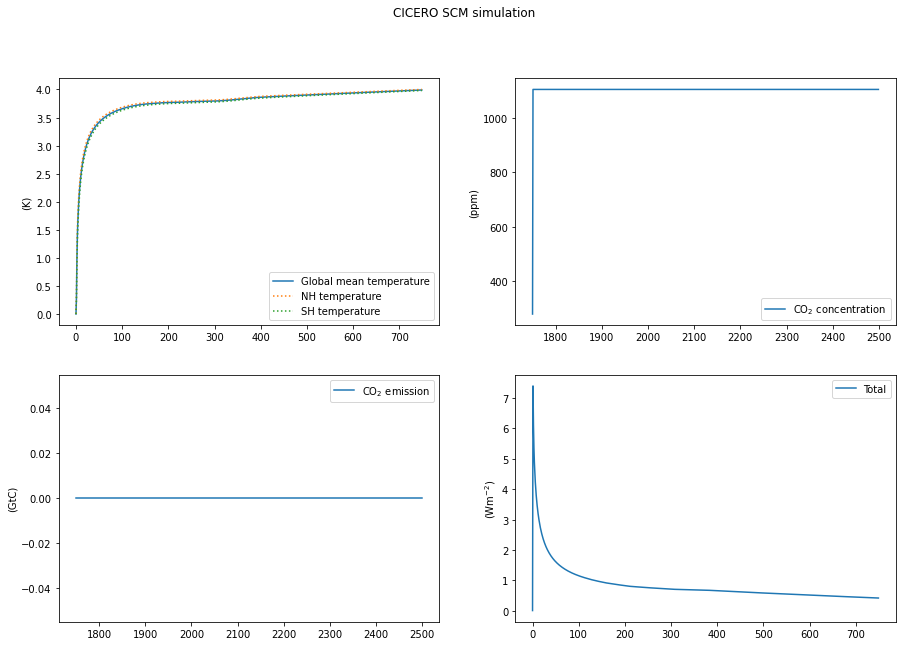

In [134]:
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
axs=axs.flatten()
fig.suptitle('CICERO SCM simulation')

df_temp['dT_glob'].plot(ylabel='(K)',ax=axs[0])
df_temp['dT_NH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
df_temp['dT_SH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
axs[0].legend(['Global mean temperature','NH temperature','SH temperature'])

df_temp['concentrations']['CO2'].plot(ylabel='(ppm)',ax=axs[1])
axs[1].legend([r'CO$_2$ concentration'])

df_temp['emissions']['CO2'].plot(ylabel='(GtC)',ax=axs[2])
axs[2].legend([r'CO$_2$ emission'])

df_temp['RIB_glob'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3])

axs[3].legend([r'Total','CO$_2$','CH$_4$','Land Use'])

# Gregory plot

Text(0, 0.5, 'NET TOA (Wm$^{-2}$)')

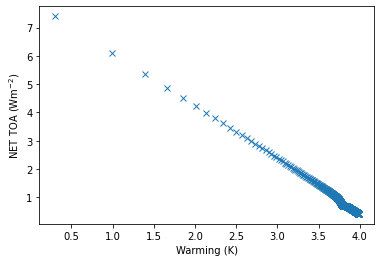

In [132]:
plt.plot(df_temp['dT_glob'][1:],df_temp['RIB_glob'][1:],'x')
plt.xlabel('Warming (K)')
plt.ylabel('NET TOA (Wm$^{-2}$)')
